In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
import seaborn as sns
sns.set_theme(style="ticks", font_scale=1.5)
import os
import json
from datetime import datetime
import inspect
import os
import sys
sys.path.append('../Classes')
from my_model_class import Model
from my_solving_class import Solving

import colorsys
import matplotlib.colors as mcolors

In [2]:
m1 = Model()
s1 = Solving(m1)

# red = '#d62728'
# blue = '#0484d0'

red = ['#fda2b7', '#d10333', '#6c011a']
yellow = ['#fbce36', '#f9c105', '#c79b04']
# blue = ['#71c8fc', '#0484d0', '#02456c']
blue = ['#3fb5fb', '#0384d0', '#02456c']

TC_values = [0, 0.4]
p = np.linspace(2/180, 800/180, 500)



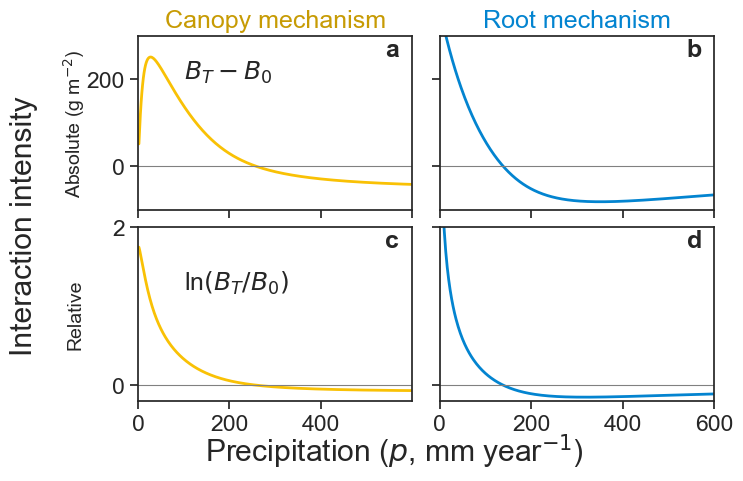

In [6]:
# ──────────────────────────────────────────────────────────
# 1. FIGURE & AXES
# ──────────────────────────────────────────────────────────
fig, axes = plt.subplots(2, 2, figsize=(8, 5))#, sharex='col', sharey='row')
fig.subplots_adjust(left=0.18, bottom=0.15, wspace=0.10, hspace=0.10)
ax0, ax1, ax2, ax3 = axes.flatten()          # L-top, R-top, L-bot, R-bot

# ──────────────────────────────────────────────────────────
# 2. PRE-COMPUTE INTENSITIES (tree vs shading)
# ──────────────────────────────────────────────────────────
m1.params.update(tree=True,  tree_is='both', Shading=0)
real_tree, log_tree = s1.solve_interaction_intensity(TC_values, p)

m1.params.update(tree=False, Shading=1)
real_sh , log_sh  = s1.solve_interaction_intensity(TC_values, p)

# ──────────────────────────────────────────────────────────
# 3. PLOT & STYLE — GROUPED BY AXIS
# ──────────────────────────────────────────────────────────
# ---------- ax0  :  shading • real  -----------------------
lw = 2
for arr in real_sh:
    ax0.plot(p*180, arr, color=yellow[1], lw=lw)
ax0.axhline(0, color='gray', lw=0.8)
# ---------- ax1  :  tree    • real  -----------------------
for arr in real_tree:
    ax1.plot(p*180, arr, color=blue[1], lw=lw)
ax1.axhline(0, color='gray', lw=0.8)
# ---------- ax2  :  shading • log   -----------------------
for arr in log_sh:
    ax2.plot(p*180, arr, color=yellow[1], lw=lw)
ax2.axhline(0, color='gray', lw=0.8)
# ---------- ax3  :  tree    • log   -----------------------
for arr in log_tree:
    ax3.plot(p*180, arr, color=blue[1], lw=lw)
ax3.axhline(0, color='gray', lw=0.8)

ax0.text(0.9, 0.88, 'a', transform=ax0.transAxes, fontsize=18, weight='bold')
ax1.text(0.9, 0.88, 'b', transform=ax1.transAxes, fontsize=18, weight='bold')
ax2.text(0.9, 0.88, 'c', transform=ax2.transAxes, fontsize=18, weight='bold')
ax3.text(0.9, 0.88, 'd', transform=ax3.transAxes, fontsize=18, weight='bold')

ax0.set(xlim=(p.min()*180, 600),
    ylim=(-100, 300),
    xticks=[0, 200, 400, 600],
    xticklabels=[])
ax0.set_ylabel(r'Absolute (g m$^{-2}$)', labelpad=0, fontsize=14)          # left-column y-label
ax0.set_title('Canopy mechanism', color=yellow[2])
ax1.set(xlim=(p.min()*180, 600),
    ylim=(-100, 300),
    xticks=[0, 200, 400, 600],
    xticklabels=[],
    yticklabels=[])
ax1.set_title('Root mechanism', color=blue[1])
ax2.set(xlim=(p.min()*180, 600),
    ylim=(-0.2, 2),
    xticks=[0, 200, 400])
ax2.set_ylabel('Relative', labelpad=20, fontsize=14)  # extra spacing
ax3.set(xlim=(p.min()*180, 600),
    ylim=(-0.2, 2),
    xticks=[0, 200, 400, 600],
    yticklabels=[])
ax0.set_yticks([0, 200])
ax1.set_yticks([0, 200])
ax2.set_yticks([0, 2])
ax3.set_yticks([0, 2])

ax0.text(100, 200, r'$B_T-B_0$')
ax2.text(100, 1.2, r'ln$(B_T/B_0)$')

# ──────────────────────────────────────────────────────────
# 4. GLOBAL LABEL & SAVE
# ──────────────────────────────────────────────────────────
fig.supxlabel(r'Precipitation ($\mathit{p}$, mm year$^{-1}$)')
fig.supylabel('Interaction intensity')#, fontsize=20)  # extra spacing
# plt.tight_layout()
# fig.tight_layout
fig.savefig('interaction_intensity.png', dpi=300, bbox_inches='tight')
fig.savefig('interaction_intensity.pdf',          bbox_inches='tight')

## interaction intensity vs soil water

In [ ]:
# ──────────────────────────────────────────────────────────
# 1. FIGURE & AXES
# ──────────────────────────────────────────────────────────
fig, axes = plt.subplots(2, 2, figsize=(8, 5))#, sharex='col', sharey='row')
fig.subplots_adjust(left=0.18, bottom=0.15, wspace=0.10, hspace=0.10)
ax0, ax1, ax2, ax3 = axes.flatten()          # L-top, R-top, L-bot, R-bot

# ──────────────────────────────────────────────────────────
# 2. PRE-COMPUTE INTENSITIES (tree vs shading)
# ──────────────────────────────────────────────────────────
m1.params.update(tree=True,  tree_is='both', Shading=0)
real_tree, log_tree = s1.solve_interaction_intensity(TC_values, p)
S0_shading = s1.S_of_P(p, 0)
    B1_shading  = s1.B_of_P(p, TC_values_shading[0]); S1_shading  = s1.S_of_P(p, TC_values_shading[0])


m1.params.update(tree=False, Shading=1)
real_sh , log_sh  = s1.solve_interaction_intensity(TC_values, p)

# ──────────────────────────────────────────────────────────
# 3. PLOT & STYLE — GROUPED BY AXIS
# ──────────────────────────────────────────────────────────
# ---------- ax0  :  shading • real  -----------------------
for arr in real_sh:
    ax0.plot(p*180, arr, color=blue, lw=3)
ax0.axhline(0, color='gray', lw=0.8)
# ---------- ax1  :  tree    • real  -----------------------
for arr in real_tree:
    ax1.plot(p*180, arr, color=red, lw=3)
ax1.axhline(0, color='gray', lw=0.8)
# ---------- ax2  :  shading • log   -----------------------
for arr in log_sh:
    ax2.plot(p*180, arr, color=blue, lw=3)
ax2.axhline(0, color='gray', lw=0.8)
# ---------- ax3  :  tree    • log   -----------------------
for arr in log_tree:
    ax3.plot(p*180, arr, color=red, lw=3)
ax3.axhline(0, color='gray', lw=0.8)

ax0.text(0.9, 0.88, 'a', transform=ax0.transAxes, fontsize=18, weight='bold')
ax1.text(0.9, 0.88, 'b', transform=ax1.transAxes, fontsize=18, weight='bold')
ax2.text(0.9, 0.88, 'c', transform=ax2.transAxes, fontsize=18, weight='bold')
ax3.text(0.9, 0.88, 'd', transform=ax3.transAxes, fontsize=18, weight='bold')

ax0.set(xlim=(p.min()*180, 600),
    ylim=(-100, 300),
    xticks=[0, 200, 400, 600],
    xticklabels=[])
ax0.set_ylabel(r'Absolute (g m$^{-2}$)', labelpad=0, fontsize=14)          # left-column y-label
ax0.set_title('Shading mechanism', color=blue)
ax1.set(xlim=(p.min()*180, 600),
    ylim=(-100, 300),
    xticks=[0, 200, 400, 600],
    xticklabels=[],
    yticklabels=[])
ax1.set_title('Tree-root mechanism', color=red)
ax2.set(xlim=(p.min()*180, 600),
    ylim=(-0.2, 2),
    xticks=[0, 200, 400])
ax2.set_ylabel('Relative', labelpad=20, fontsize=14)  # extra spacing
ax3.set(xlim=(p.min()*180, 600),
    ylim=(-0.2, 2),
    xticks=[0, 200, 400, 600],
    yticklabels=[])
ax0.set_yticks([0, 200])
ax1.set_yticks([0, 200])
ax2.set_yticks([0, 2])
ax3.set_yticks([0, 2])

ax0.text(100, 200, r'$B_T-B_0$')
ax2.text(100, 1.2, r'ln$(B_T/B_0)$')

# ──────────────────────────────────────────────────────────
# 4. GLOBAL LABEL & SAVE
# ──────────────────────────────────────────────────────────
fig.supxlabel(r'Precipitation ($\mathit{p}$) (mm year$^{-1}$)', fontsize=20)
fig.supylabel('Interaction intensity', fontsize=20)  # extra spacing
# plt.tight_layout()
# fig.tight_layout
# fig.savefig('interaction_intensity.png', dpi=300, bbox_inches='tight')
# fig.savefig('interaction_intensity.pdf',          bbox_inches='tight')

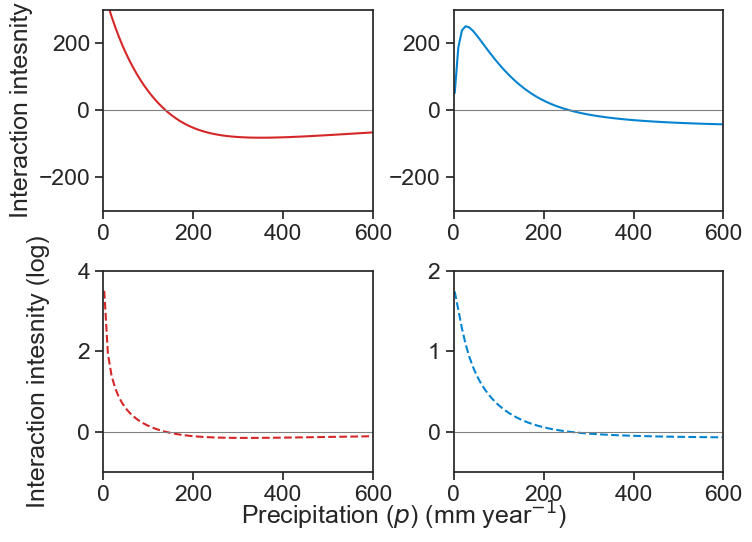

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.subplots_adjust(wspace=0.3, hspace=0.3)
ax0, ax1, ax2, ax3 = axes.flatten()

m1.params['tree'] = True
m1.params['tree_is'] = 'both'
m1.params['Shading'] = 0

intensity_list_real_tree, intensity_list_log_tree = s1.solve_interaction_intensity(TC_values, p)

for intensity_real in intensity_list_real_tree:
    ax0.plot(p * 180, intensity_real, color=red)

for intensity_log in intensity_list_log_tree:
    ax2.plot(p * 180, intensity_log, color=red, linestyle='--')

m1.params['tree'] = False
m1.params['Shading'] = 1

intensity_list_real_shading, intensity_list_log_shading = s1.solve_interaction_intensity(TC_values, p)
for intensity_real in intensity_list_real_shading:
    ax1.plot(p * 180, intensity_real, color=blue)
for intensity_log in intensity_list_log_shading:
    ax3.plot(p * 180, intensity_log, color=blue, linestyle='--')

ax0.axhline(0, color='gray', lw=0.8, ls='-')
ax1.axhline(0, color='gray', lw=0.8, ls='-')
ax2.axhline(0, color='gray', lw=0.8, ls='-')
ax3.axhline(0, color='gray', lw=0.8, ls='-')

ax0.set(ylabel='Interaction intesnity',
        xlim=(p.min() * 180, 600),
        ylim=(-300, 300),
        xticks=[0,200, 400, 600],
        )
ax1.set(xlim=(p.min() * 180, 600),
        ylim=(-300, 300),
        xticks=[0,200, 400, 600],
        )
ax2.set(ylabel='Interaction intesnity (log)',
        xlim=(p.min() * 180, 600),
        ylim=(-1, 4),
        xticks=[0,200, 400, 600],
        )
ax2.set_ylabel('Interaction intesnity (log)', labelpad=20)
ax3.set(xlim=(p.min() * 180, 600),
        ylim=(-0.5, 2),
        xticks=[0,200, 400, 600],
        )
fig.supxlabel(r'Precipitation ($\mathit{p}$) (mm year$^{-1}$)', fontsize=18)

fig.savefig('interaction_intensity.png', dpi=300, bbox_inches='tight')
fig.savefig('interaction_intensity.pdf', bbox_inches='tight')

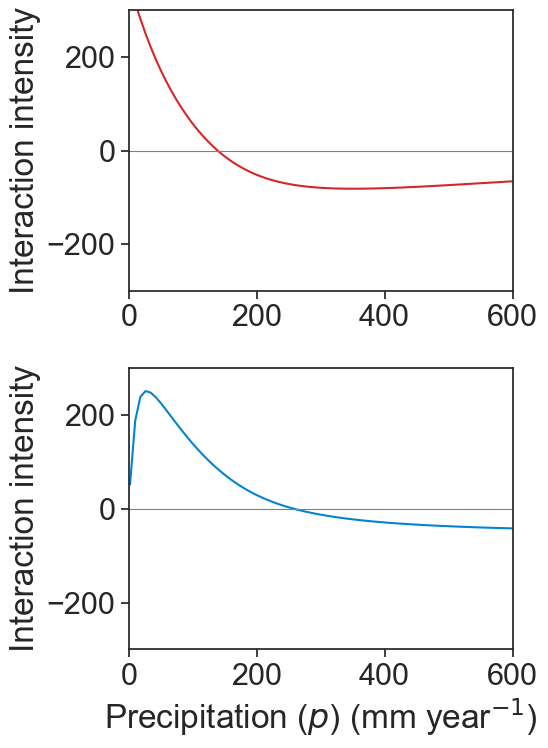

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

# Tree interaction intensity
m1.params['tree'] = True
m1.params['tree_is'] = 'both'
m1.params['Shading'] = 0

intensity_list_real_tree, intensity_list_log_tree = s1.solve_interaction_intensity(TC_values, p)

for intensity_real in intensity_list_real_tree:
    ax1.plot(p * 180, intensity_real, color=red)

ax1.axhline(0, color='gray', lw=0.8, ls='-')
ax1.set(ylabel='Interaction intensity',
       xlim=(p.min() * 180, 600),
       ylim=(-300, 300),
       xticks=[0, 200, 400, 600],
       )

# Shading interaction intensity
m1.params['tree'] = False
m1.params['Shading'] = 1

intensity_list_real_shading, intensity_list_log_shading = s1.solve_interaction_intensity(TC_values, p)
for intensity_real in intensity_list_real_shading:
    ax2.plot(p * 180, intensity_real, color=blue)

ax2.axhline(0, color='gray', lw=0.8, ls='-')
ax2.set(xlabel=r'Precipitation ($\mathit{p}$) (mm year$^{-1}$)',
       xlim=(p.min() * 180, 600),
       ylim=(-300, 300),
       xticks=[0, 200, 400, 600],
       ylabel='Interaction intensity')

plt.tight_layout()
fig.savefig('interaction_intensity_comparison.png', dpi=300, bbox_inches='tight')
fig.savefig('interaction_intensity_comparison.pdf', bbox_inches='tight')


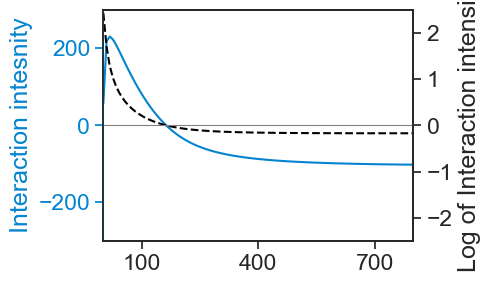

In [17]:
fig, ax = plt.subplots(figsize=(4, 3))
ax2 = ax.twinx()

intensity_list_real, intensity_list_log = s1.solve_interaction_intensity(TC_values, p)

for intensity_real in intensity_list_real:
    ax.plot(p * 180, intensity_real, color='#0484d0')

for intensity_log in intensity_list_log:
    ax2.plot(p * 180, intensity_log, color='black', linestyle='--')

ax.set(ylabel='Interaction intesnity',
        xlim=(p.min() * 180, p.max() * 180),
        ylim=(-300, 300),
        xticks=[100, 400, 700],
        )

ax.yaxis.label.set_color(blue)
ax.tick_params(axis='y', colors=blue)
ax.spines['left'].set_color(blue)

ax2.set(ylabel='Log of Interaction intensity',
        ylim=(-2.5, 2.5)
        )   
ax2.axhline(0, color='gray', lw=0.8, ls='-')


fig.savefig('interaction_intensity.png', dpi=300, bbox_inches='tight')
fig.savefig('interaction_intensity.pdf', bbox_inches='tight')